# Análisis Exploratorio de Tweets

## Introducción

Diariamente se generan aproximadamente 600 millones de tweets que cuyo contenido puede ser utilizado para comprender las conversaciones, intereses y contenido que los usuarios de esta red social comparten (http://www.internetlivestats.com/twitter-statistics/, 2019). El propósito de este notebook es realizar un análisis exploratorio de la cuenta de un usuario de tweeter utilizando Python.

Se eligió la cuenta del Presidente de México, por ser un usuario de interés público. 

Las preguntas que se intentan contestar con este análisis exploratorio son las siguientes:

1) Longitud promedio de tweets

2) Número máximo de tweets

3) Número máximo de retweets

4) Cuáles son los 5 tweets más populares

En este análisis solamente se incluyen los 200 tweets más recientes que abarcan del 8 de agosto de 2018 al 6 de enero de 2019.

## Cargar librerías

Las librerías utilizadas en este análisis son las siguientes:

In [3]:
# Numpy
import numpy as np
# Pandas
import pandas as pd
# Matplotlib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

## Cargar datos

Los datos se extrajeron utilizando la API de twitter y la librería tweepy. El script se encuentra en el archivo <b>tweepy_streamer.py</b> el cual guarda los últimos 200 tweets en el archivo <b>tweets.csv</b>.

In [4]:
df = pd.read_csv('tweets.csv', index_col='date', parse_dates=True)

El archivo CSV contiene 200 filas y siete columnas incluyendo el índice del pandas dataframe.

In [5]:
df.shape

(200, 6)

La información que se extrajo de los tweets son:

1) date (índice): fecha en la que fue publicado el tweet.

2) texto: contenido del tweet.

3) id: id del tweet.

4) len: longitud de caracteres del tweet.

5) source: fuente de la que provino el tweet.

6) likes: número de "me gusta" por tweet.

7) retweets: número de "retweets" por tweet.

A continuación se muestran los 5 tweets más recientes.

In [6]:
df.head()

,Tweets,id,len,source,likes,retweets
date,,,,,,
2019-01-06 23:07:38,Programa de la Zona Libre de la Frontera Norte...,1082051092005834752,103,Periscope,3588,1198
2019-01-05 18:02:48,Programa de la Zona Libre de la Frontera Norte...,1081611988201963520,103,Periscope,6395,1945
2019-01-05 01:56:13,"Ya funciona la reducción del IVA, del ISR, del...",1081368741953191941,139,Twitter for iPhone,13468,3872
2019-01-04 12:55:57,Cuentas claras y chocolate espeso. Conferencia...,1081172380377001984,89,Periscope,10386,2827
2019-01-04 01:21:24,"Hoy en Morelia, Michoacán, hablé del compromis...",1080997590873849857,140,Twitter for iPhone,11137,2798


## Estadísticas

Se calcularon las siguientes estadísticas sobre la muestra de 200 tweets.

La longitud promedio de los tweets es de 120 de los 140 caracteres que permite la aplicación.

In [8]:
# Estadísticas
# Get average length over all tweets
print("Longitud promedio del tweet: {}".format(np.mean(df['len'])))

Longitud promedio del tweet: 119.6


De la muestra de 200 tweets se ha obtenido un máximo de 79,676 likes.

In [9]:
# Get the number of likes for the most liked tweet.
print("Máximo número de likes: {}".format(np.max(df['likes'])))

Máximo número de likes: 79676


De la muestra de 200 tweets se ha obtenido un máximo de 19,977 likes.

In [11]:
# Get the number of retweets for the most retweeted tweet
print("Máximo número de retweets: {}".format(np.max(df['retweets'])))

Máximo número de retweets: 19977


## Likes y retweets de los 200 más recientes

En la siguiente gráfica se presentan las series de tiempo del comportamiento de likes y retweets para la muestra de 200 tweets. Se puede observar que ambas series se encuentran muy correlacionadas, sin embargo, los likes siempre son mayores a los retweets.

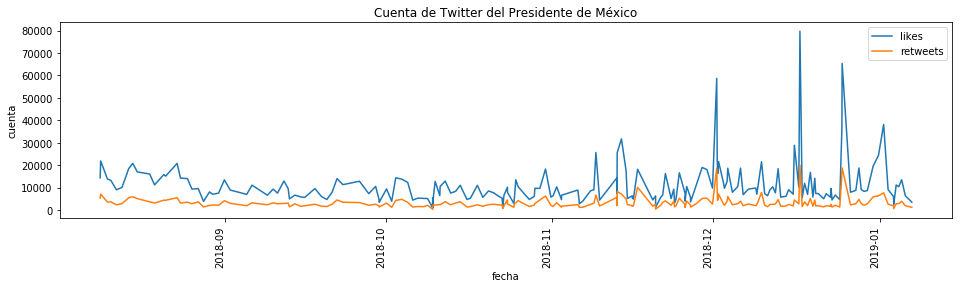

In [5]:
# Time series
time_likes = pd.Series(data=df['likes'].values, index=df.index)
time_likes.plot(figsize=(16,4), label = "likes" , legend= True)

time_retweets = pd.Series(data=df['retweets'].values, index=df.index)
time_retweets.plot(figsize=(16,4), label = "retweets" , legend= True)

plt.title('Cuenta de Twitter del Presidente de México')
plt.xlabel('fecha')
plt.ylabel('cuenta')
plt.xticks(rotation='vertical')
plt.show()

Desde el 8 de agosto de 2018 al 6 de enero de 2019 ha habido 3 tweets que han rebasado los 50,000 likes. Los cuales se investigan a continuación.

## Top 5 tweets más gustados y retweeteados

Se invetigan los 5 tweets más populares por número de likes.

In [13]:
pd.set_option('display.max_colwidth',140)
top_5_tweets = df.sort_values('likes',ascending=False).head()
top_5_tweets[['Tweets', 'likes']]

,Tweets,likes
date,,
2018-12-17 02:55:06,"Felicitaciones al América; ánimo al Cruz Azul. «El que persevera, alcanza».",79676
2018-12-24 23:42:28,"En lo personal, mi más profundo pésame a los familiares del senador Rafael Moreno Valle y de su esposa, la gobernad… https://t.co/61Abbq...",65341
2018-12-01 14:53:09,Inicia la cuarta transformación de la vida pública de México. Empeño mi palabra: no les defraudaré. https://t.co/Y4cJbuejYR,58681
2019-01-01 17:17:46,Confieso que estoy optimista. Nos irá bien a todos los mexicanos en este año 2019. ¡Felicidades!… https://t.co/IL8p0YmLdn,38118
2018-12-24 22:33:40,Estoy recibiendo información de un accidente en Puebla por desplome de un helicóptero. Por confirmar que iban la go… https://t.co/W9Gs9S...,36134


El tweet más popular en la cuenta del Presidente de México es sobre la victoria del América sobre el Cruz Azúl en la Final del Football méxicano. En segundo lugar, se encuentra el mensaje de pésame a la familia del Senador Moreno Valle y su esposa la Gobernadora de Puebla. Su tercer tweet más popular es el mensaje que envió en su toma de protesta como Presidente. El cuarto más popular es su mensaje de año nuevo y por últimno la noticia sobre el accidente aéreo en el que murieron el Senador Moreno Valle y su esposa la Gobernadora de Puebla.